# Example 1: Independent photons with Gaussian spectral amplitudes

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from spectral_hom.main import GaussianPulse, IndependentGaussianCoincidence

Figure a)

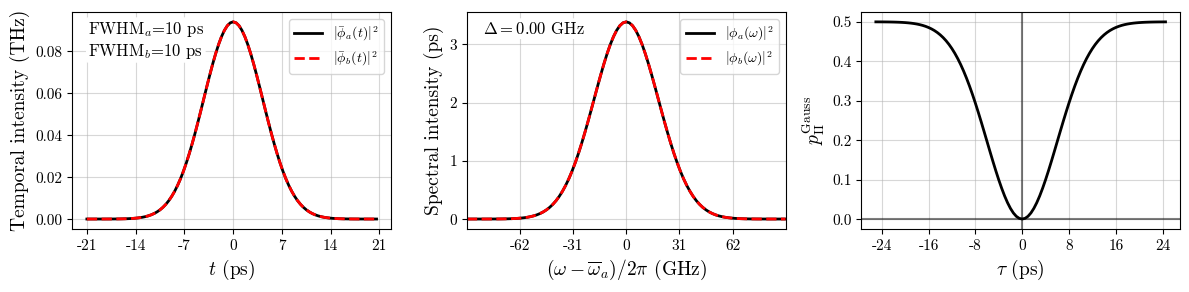

In [15]:
# set first Gaussian parameters
gaussian_a_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 10  # Intensity Full-Width-Half-Max (ps)
                     }
# set second Gaussian parameters
gaussian_b_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 10,  # Intensity Full-Width-Half-Max (ps)
                     }

# create two Gaussian objects
gaussian_a = GaussianPulse(gaussian_a_params)
gaussian_b = GaussianPulse(gaussian_b_params)

# set Gaussian coincidence parameters 
gaussian_coincidence_params = {'gaussian_a': gaussian_a,
                               'gaussian_b': gaussian_b
                               }

# create independent gaussian coincidence object
gaussian_coincidence = IndependentGaussianCoincidence(gaussian_coincidence_params)

# plot temporal and spectral intensity and coincidence probability
gaussian_coincidence.plot_coincidence('Fig3a')

Figure b)

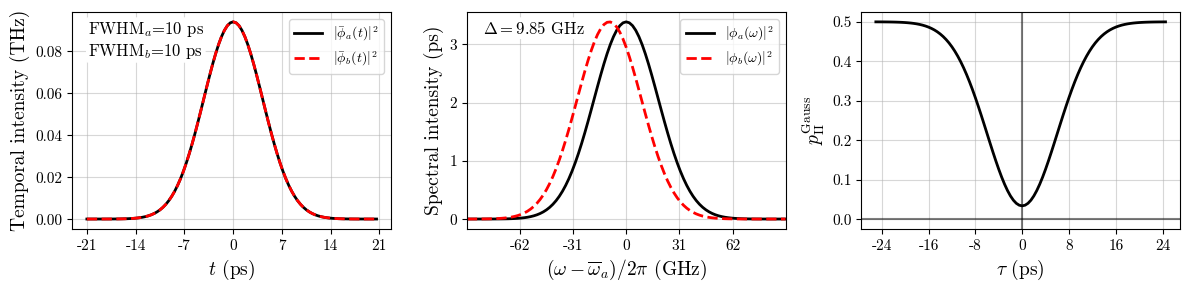

In [16]:
# set first Gaussian parameters
gaussian_a_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 10  # Full-Width-Half-Max (ps)
                     }
# set second Gaussian parameters
gaussian_b_params = {'lambda_c': 780.02,  # center wavelength (nm)
                     'FWHM': 10,  # Full-Width-Half-Max (ps)
                     }

# create two Gaussian objects
gaussian_a = GaussianPulse(gaussian_a_params)
gaussian_b = GaussianPulse(gaussian_b_params)

# set Gaussian coincidence parameters 
gaussian_coincidence_params = {'gaussian_a': gaussian_a,
                               'gaussian_b': gaussian_b
                               }

# create independent gaussian coincidence object
gaussian_coincidence = IndependentGaussianCoincidence(gaussian_coincidence_params)

# plot temporal and spectral intensity and coincidence probability
gaussian_coincidence.plot_coincidence('Fig3b')

Figure c)

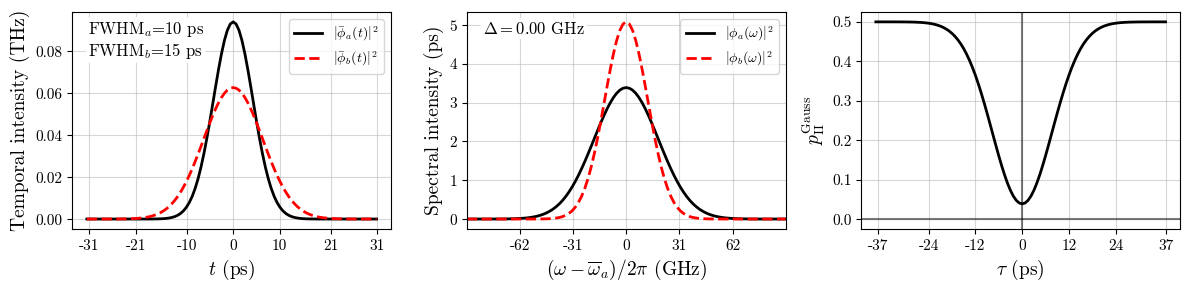

In [17]:
# set first Gaussian parameters
gaussian_a_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 10  # Full-Width-Half-Max (ps)
                     }
# set second Gaussian parameters
gaussian_b_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 15,  # Full-Width-Half-Max (ps)
                     }

# create two Gaussian objects
gaussian_a = GaussianPulse(gaussian_a_params)
gaussian_b = GaussianPulse(gaussian_b_params)

# set Gaussian coincidence parameters 
gaussian_coincidence_params = {'gaussian_a': gaussian_a,
                               'gaussian_b': gaussian_b
                               }

# create independent gaussian coincidence object
gaussian_coincidence = IndependentGaussianCoincidence(gaussian_coincidence_params)

# plot temporal and spectral intensity and coincidence probability
gaussian_coincidence.plot_coincidence('Fig3c')

Figure d)

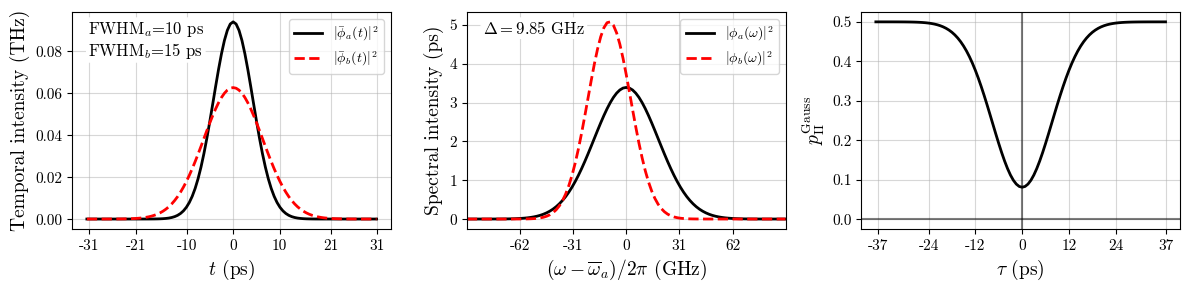

In [18]:
# set first Gaussian parameters
gaussian_a_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 10  # Full-Width-Half-Max (ps)
                     }
# set second Gaussian parameters
gaussian_b_params = {'lambda_c': 780.02,  # center wavelength (nm)
                     'FWHM': 15,  # Full-Width-Half-Max (ps)
                     }

# create two Gaussian objects
gaussian_a = GaussianPulse(gaussian_a_params)
gaussian_b = GaussianPulse(gaussian_b_params)

# set Gaussian coincidence parameters 
gaussian_coincidence_params = {'gaussian_a': gaussian_a,
                               'gaussian_b': gaussian_b
                               }

# create independent gaussian coincidence object
gaussian_coincidence = IndependentGaussianCoincidence(gaussian_coincidence_params)

# plot temporal and spectral intensity and coincidence probability
gaussian_coincidence.plot_coincidence('Fig3d')